In [1]:
# Import pandas and numpy for loading, reading, and data preprocessing
import pandas as pd
import numpy as np

# Load and read datasets
books_data = pd.read_csv('Books.csv')
ratings_data = pd.read_csv('Ratings.csv')
user_data = pd.read_csv('Users.csv')

C:\Users\0watsc31\AppData\Local\Temp\ipykernel_10148\936424608.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv('Books.csv')


 # Initial Data Analysis

In [2]:
books_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
user_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
# View how many rows and columns
print(books_data.shape)
print(ratings_data.shape)
print(user_data.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [6]:
# Get basic info about the csv files 
books_data.info()
ratings_data.info()
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), obje

In [9]:
# Check data type and if columns are correctly typed
print(books_data.dtypes) 
print()
print(ratings_data.dtypes)
print()
print(user_data.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

User-ID       int64
Location     object
Age         float64
dtype: object


In [10]:
# Get the number of unique values in each column
print(books_data.nunique())  
print()
print(ratings_data.nunique())  
print()
print(user_data.nunique())

ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

User-ID     278858
Location     57339
Age            165
dtype: int64


In [12]:
# View the frequency of different values
print(books_data['Book-Title'].value_counts().head(10))  # Top 10 most common book titles
print()
print(ratings_data['User-ID'].value_counts().head(10))  # Top 10 most active users
print()
print(user_data['Location'].value_counts().head(10))   # Top 10 locations among users 

Book-Title
Selected Poems                    27
Little Women                      24
Wuthering Heights                 21
The Secret Garden                 20
Dracula                           20
Adventures of Huckleberry Finn    20
Jane Eyre                         19
The Night Before Christmas        18
Pride and Prejudice               18
Great Expectations                17
Name: count, dtype: int64

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain               

In [14]:
# Check for missing values
print(books_data.isnull().sum())
print()
print(ratings_data.isnull().sum())
print()
print(user_data.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

User-ID          0
Location         0
Age         110762
dtype: int64


In [16]:
# Check for duplicates
print(books_data.duplicated().sum())
print(ratings_data.duplicated().sum())
print(user_data.duplicated().sum())

0
0
0


In [18]:
# Summary statistics 
print(books_data.describe())
print()
print(ratings_data.describe())
print()
print(user_data.describe())

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
freq          

In [21]:
# Drop the non-numeric columns (e.g., 'ISBN') for correlation analysis
ratings_numeric = ratings_data.drop(columns=['ISBN'])

# Calculate the correlation for numeric columns only
correlation_matrix = ratings_numeric.corr()

# Print correlation matrix
print(correlation_matrix)

              User-ID  Book-Rating
User-ID      1.000000    -0.046944
Book-Rating -0.046944     1.000000


# Data Preprocessing

Handling Missing Values and Cleaning the Data -- Users, Books, Ratings

In [2]:
# For User Data 

# Calculate the median of the Age column, excluding missing values
median_age = user_data['Age'].median()

# Fill missing values in the Age column with the median value
user_data['Age'].fillna(median_age, inplace=True)

# Verify that there are no more missing values in the Age column
print(user_data['Age'].isnull().sum())

0


In [3]:
#Capping the outlier rows with Percentiles
upper_lim = user_data['Age'].quantile(.95)
lower_lim = user_data['Age'].quantile(.05)
user_data.loc[(user_data["Age"] > upper_lim),"Age"] = upper_lim
user_data.loc[(user_data["Age"] < lower_lim),"Age"] = lower_lim

In [10]:
user_data['Age'].describe()

count    278858.000000
mean         33.402570
std           9.523058
min          18.000000
25%          29.000000
50%          32.000000
75%          35.000000
max          56.000000
Name: Age, dtype: float64

In [4]:
# For Book Data

# Fill missing values in the Book-Author column with a placeholder
books_data['Book-Author'].fillna('Unknown Author', inplace=True)

# Fill missing values in the Publisher column with a placeholder
books_data['Publisher'].fillna('Unknown Publisher', inplace=True)

# Verify that there are no more missing values in the relevant columns
print(books_data[['Book-Author', 'Publisher']].isnull().sum())

Book-Author    0
Publisher      0
dtype: int64


In [12]:
# Book Data (continued)
books_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [5]:
# Convert years from objects to integers
# Convert invalid entries to NaN
books_data['Year-Of-Publication'] = pd.to_numeric(books_data['Year-Of-Publication'], errors='coerce')

# Fill NaN values with with 0
books_data['Year-Of-Publication'].fillna(0, inplace=True)  

# Verify the conversion
print(books_data['Year-Of-Publication'].dtype)

float64


In [14]:
books_data['Year-Of-Publication'].describe()

count    271360.000000
mean       1959.739151
std         258.075075
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

In [6]:
# Calculate the upper and lower limits for capping the outliers
upper_lim = 2024  # Set the upper limit to 2024
lower_lim = books_data['Year-Of-Publication'].quantile(0.05)  # 5th percentile

# Cap the outlier rows
books_data.loc[books_data['Year-Of-Publication'] > upper_lim, 'Year-Of-Publication'] = upper_lim
books_data.loc[books_data['Year-Of-Publication'] < lower_lim, 'Year-Of-Publication'] = lower_lim

# Verify the changes
print(books_data['Year-Of-Publication'].describe())

count    271360.000000
mean       1993.610661
std           7.651836
min        1976.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2024.000000
Name: Year-Of-Publication, dtype: float64


 Merging the Datasets

In [7]:
#Merging users and rating dataframe
users_ratings_df = pd.merge(user_data,ratings_data, on='User-ID')

In [8]:
# Merging combined data of users and ratings with books data on ISBN column
merged_df = pd.merge(books_data,users_ratings_df, on='ISBN')

In [9]:
# Verify all 3 dataframes merged correctly
merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",32.0,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",32.0,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",32.0,0


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  float64
 4   Publisher            1031136 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Location             1031136 non-null  object 
 10  Age                  1031136 non-null  float64
 11  Book-Rating          1031136 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 94.4+ MB


In [10]:
# Drop unnecessary features
merged_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'], axis=1,inplace=True)

merged_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Location,Age,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,"stockton, california, usa",18.0,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,"timmins, ontario, canada",32.0,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11400,"ottawa, ontario, canada",49.0,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,"n/a, n/a, n/a",32.0,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,41385,"sudbury, ontario, canada",32.0,0


# Exploratory Data Analysis

Ratings per Book

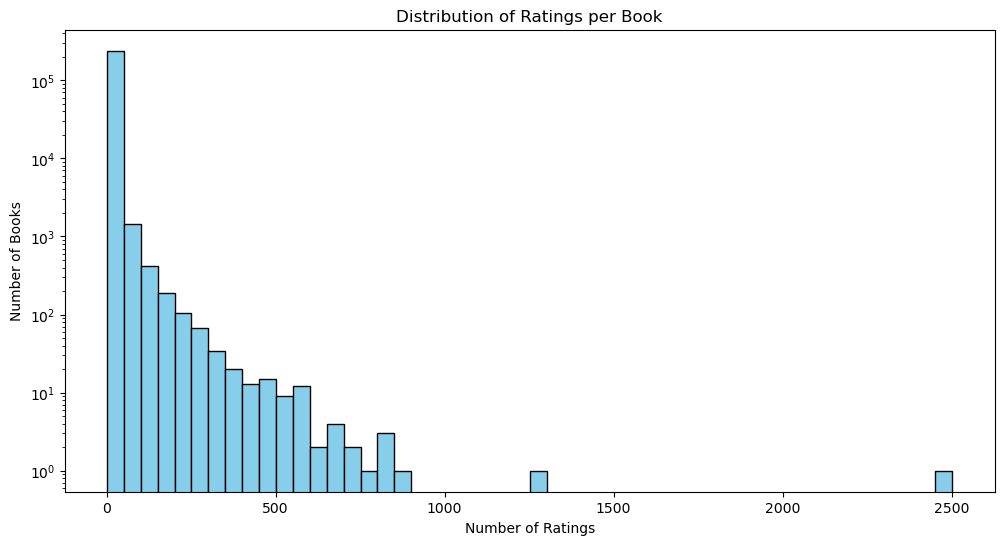

In [11]:
#Import necessary visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Book-Title' and count the number of ratings for each book
ratings_per_book = merged_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
ratings_per_book.columns = ['Book-Title', 'Num-Ratings']

# Sort the books by the number of ratings in descending order 
ratings_per_book = ratings_per_book.sort_values(by='Num-Ratings', ascending=False)

# Plot the distribution of ratings per book
plt.figure(figsize=(12, 6))
plt.hist(ratings_per_book['Num-Ratings'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.title('Distribution of Ratings per Book')
plt.yscale('log')  # Log scale to account for large skew in the data
plt.show()

Top 10 Most Occuring Books

In [20]:
# Get the top 10 most frequently occurring books in the dataset
Top10_Book = merged_df['Book-Title'].value_counts().reset_index().head(10)
Top10_Book.columns = ['Book_Title', 'Count']  # Rename columns appropriately

# Check the column names to ensure they were renamed correctly
print(Top10_Book.columns)

Index(['Book_Title', 'Count'], dtype='object')


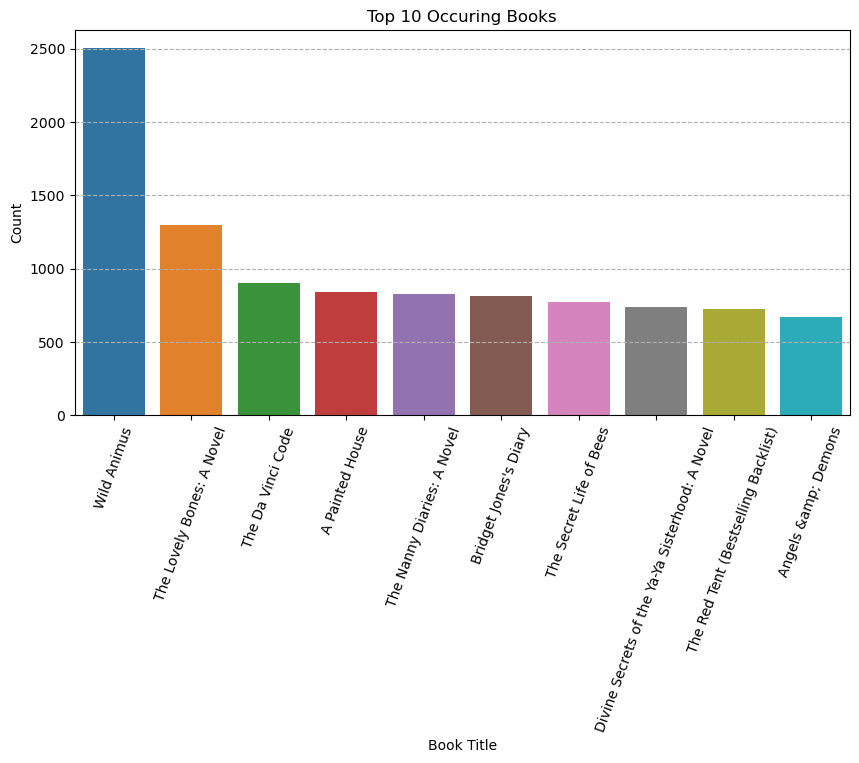

In [22]:
# Plotting the barplot for top 10 books
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(x='Book_Title', y='Count', data=Top10_Book)
plt.xticks(rotation=70, horizontalalignment="center")
plt.grid(axis='y', linestyle='--')
plt.title('Top 10 Occuring Books')
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.show()

Top 10 author with most books written

In [28]:
# Create a DataFrame of the top 10 authors based on their book count
Top10_author = merged_df['Book-Author'].value_counts().reset_index().head(10)

# Rename columns to clearly indicate author names and count of books
Top10_author.columns = ['Book-Author', 'Count']

# Display the top 10 authors DataFrame
Top10_author

,Book-Author,Count
0,Stephen King,10053
1,Nora Roberts,8429
2,John Grisham,6010
3,James Patterson,5845
4,Mary Higgins Clark,4777
5,Dean R. Koontz,4313
6,Tom Clancy,4036
7,Danielle Steel,3726
8,Sue Grafton,3457
9,Janet Evanovich,3350


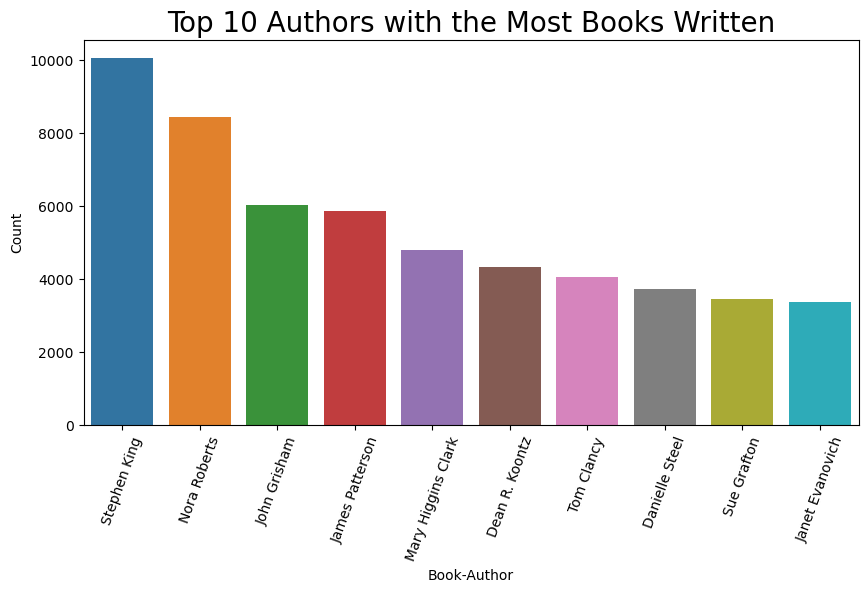

In [29]:
# Create a barplot for the top 10 authors
sns.barplot(x="Book-Author", y="Count", data=Top10_author)

# Rotate x-axis labels for better readability
plt.xticks(rotation=70, horizontalalignment="center")

# Set plot title and font size
plt.title("Top 10 Authors with the Most Books Written", fontsize=20)

# Display the plot
plt.show()

Top 10 Countries

In [67]:
import re

# Dictionary to map common abbreviations and country names correctly
country_mapping = {
    'usa': 'USA', 'canada': 'Canada', 'kingdom': 'United Kingdom', 
    'germany': 'Germany', 'australia': 'Australia', 'spain': 'Spain', 
    'france': 'France', 'portugal': 'Portugal', 'uk': 'United Kingdom'
}

# Function to extract and map country name
def extract_country(location):
    # Extract the last word in location string
    country = re.search(r'([a-zA-Z]+)$', location.lower())
    if country:
        country = country.group(1)
        # Use the dictionary to map to correct country name
        return country_mapping.get(country, country.capitalize())
    return 'Unknown'  # For locations that don't match

# Apply the function to create a clean 'Country' column
merged_df['Country'] = merged_df['Location'].apply(extract_country)

In [68]:
# Create dataframe for Top 5 Countries 
Top5_Country = merged_df['Country'].value_counts().reset_index().head(5)
Top5_Country.columns = ['Country', 'Count']  

In [69]:
# Check the column names to confirm they are correct
print(Top5_Country.columns)
print(Top5_Country.head(10))

Index(['Country', 'Count'], dtype='object')
          Country   Count
0             USA  746467
1          Canada   93001
2  United Kingdom   33072
3         Germany   27657
4         Unknown   24551


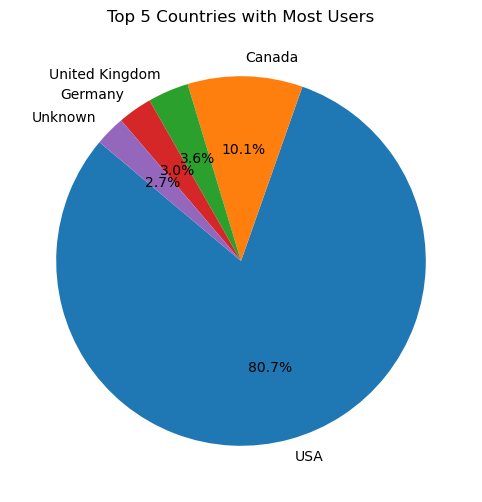

In [71]:
# Pie chart for top 5 countries with most users
plt.figure(figsize=(8, 6))
plt.pie(Top5_Country['Count'], labels=Top5_Country['Country'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries with Most Users")
plt.show()

Correlation Analysis - Books and Ratings

In [78]:
# Select numerical columns
numerical_data = merged_df.select_dtypes(include='number')

In [79]:
# Calculate correlation between numerical columns
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

              User-ID       Age  Book-Rating
User-ID      1.000000 -0.013606    -0.044021
Age         -0.013606  1.000000    -0.025252
Book-Rating -0.044021 -0.025252     1.000000


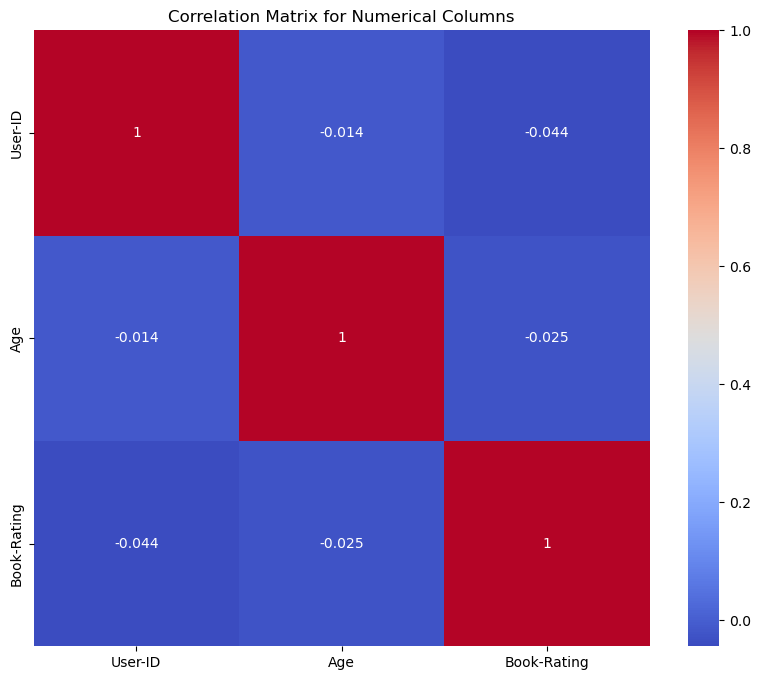

In [80]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

Distribution for each Book's Average Rating

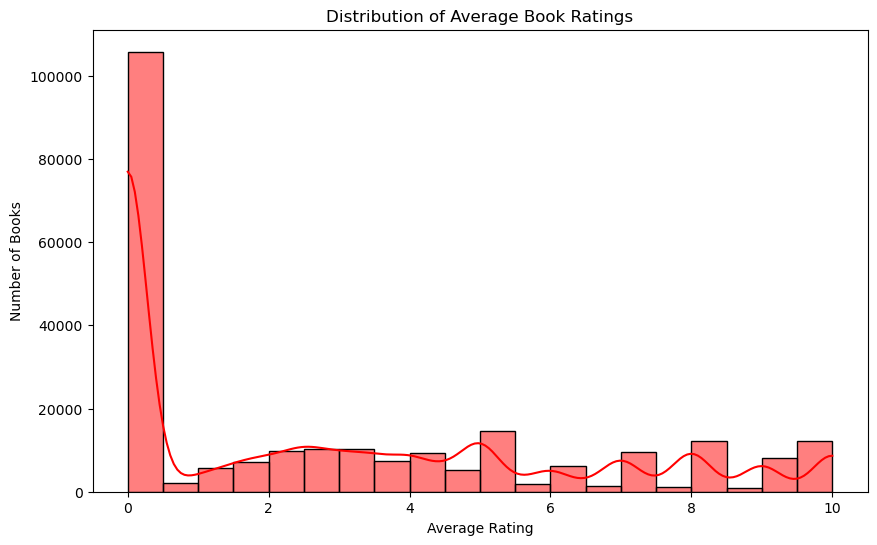

In [82]:
# Calculate average ratings per book
average_ratings = merged_df.groupby('Book-Title')['Book-Rating'].mean()

# Plot the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(average_ratings, bins=20, kde=True, color='red')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Average Book Ratings')
plt.show()

# Create Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Ensure necessary columns are present
data = merged_df[['User-ID', 'Book-Title', 'Book-Rating']].dropna()

# Encode User and Book IDs
user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

data['User'] = user_encoder.fit_transform(data['User-ID'])
data['Book'] = book_encoder.fit_transform(data['Book-Title'])

# Convert to numpy array format for compatibility
data_array = data[['User', 'Book', 'Book-Rating']].values

# Perform the train-test split
train_data, test_data = train_test_split(data_array, test_size=0.2, random_state=42)

# Display shapes to confirm
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (824908, 3)
Testing data shape: (206228, 3)


# Build the Neural Collaborative Filtering Model 

In [14]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/cf/24/271e77c22724f370c24c705f394b8035b4d27e4c2c6339f3f45ab9b8258e/tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.18.0 from https://files.pythonhosted.org/packages/76/ad/fa6c508a15ff79cb5409294c293388e0999b7d480f84b65e4287277434fe/tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\chery\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [11]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [14]:
# Import necessary modules from tensorflow
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Define hyperparameters
embedding_dim = 50  # Size of embedding vectors
num_users = int(train_data[:, 0].max() + 1)  # Total unique users
num_books = int(train_data[:, 1].max() + 1)  # Total unique books

# Define user and book embeddings
user_input = Input(shape=(1,), name='User-Input')
book_input = Input(shape=(1,), name='Book-Input')

# Create embedding layers with regularization for diversity
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, 
                           name='User-Embedding', embeddings_regularizer=l2(1e-6))(user_input)
book_embedding = Embedding(input_dim=num_books, output_dim=embedding_dim, 
                           name='Book-Embedding', embeddings_regularizer=l2(1e-6))(book_input)

# Flatten embeddings to create dense vectors for each user and book
user_vector = Flatten(name='Flatten-User')(user_embedding)
book_vector = Flatten(name='Flatten-Book')(book_embedding)

# Concatenate embeddings and add hidden layers for non-linear interactions
concatenated = Concatenate(name='Concatenate')([user_vector, book_vector])

# Add fully connected layers to learn complex patterns
# Layer 1 with dropout to add diversity and avoid overfitting
dense_layer_1 = Dense(128, activation='relu', name='Dense-Layer-1')(concatenated)
dropout_1 = Dropout(0.3)(dense_layer_1)  # Dropout layer to add some regularization

# Layer 2 with L2 regularization to encourage diversity by penalizing dominant preferences
dense_layer_2 = Dense(64, activation='relu', name='Dense-Layer-2', kernel_regularizer=l2(1e-6))(dropout_1)
dropout_2 = Dropout(0.3)(dense_layer_2)  # Additional dropout layer for regularization

# Output layer for predicting interaction score
output = Dense(1, activation='sigmoid', name='Output-Layer')(dropout_2)

# Define and compile the model
model = Model(inputs=[user_input, book_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model structure
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ User-Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book-Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 50)     │  4,605,300 │ User-Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book-Embedding      │ (None, 1, 50)     │ 12,053,550 │ Book-Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Flatten-User        │ (None, 50)        │          0 │ User-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Flatten-Book        │ (None, 50)        │          0 │ Book-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concatenate         │ (None, 100)       │          0 │ Flatten-User[0][… │
│ (Concatenate)       │                   │            │ Flatten-Book[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense-Layer-1       │ (None, 128)       │     12,928 │ Concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ Dense-Layer-1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense-Layer-2       │ (None, 64)        │      8,256 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ Dense-Layer-2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output-Layer        │ (None, 1)         │         65 │ dropout_1[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,680,099 (63.63 MB)

 Trainable params: 16,680,099 (63.63 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and Train the Model

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the Model
# Use binary cross-entropy if you're treating the ratings as implicit feedback (0 or 1), 
# or mean squared error if using explicit ratings (1–5).
# In this case, let's assume binary cross-entropy for implicit feedback
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare Training and Validation Data
# Split train_data into user, book, and rating components for model input
train_users = train_data[:, 0]
train_books = train_data[:, 1]
train_ratings = train_data[:, 2]

# Similarly, prepare validation data (20% of training data for validation)
val_users = test_data[:, 0]
val_books = test_data[:, 1]
val_ratings = test_data[:, 2]

# Train the Model
# Use EarlyStopping to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    x=[train_users, train_books],  # Inputs: user and book IDs
    y=train_ratings,               # Target: interaction ratings
    validation_data=([val_users, val_books], val_ratings),
    epochs=20,                     # Number of epochs for training
    batch_size=256,                # Adjust batch size based on dataset size
    callbacks=[early_stopping]     # Stop early if validation loss doesn't improve
)

Epoch 1/20


C:\Users\0watsc31\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['User-Input', 'Book-Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3223/3223 ━━━━━━━━━━━━━━━━━━━━ 596s 184ms/step - accuracy: 0.0050 - loss: -3965521.0000 - val_accuracy: 0.0016 - val_loss: -81748376.0000
Epoch 2/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 596s 185ms/step - accuracy: 0.0013 - loss: -204562720.0000 - val_accuracy: 0.0016 - val_loss: -796573504.0000
Epoch 3/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 607s 188ms/step - accuracy: 0.0013 - loss: -1268242688.0000 - val_accuracy: 0.0016 - val_loss: -2925301248.0000
Epoch 4/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 602s 187ms/step - accuracy: 0.0014 - loss: -4082857472.0000 - val_accuracy: 0.0016 - val_loss: -7387558400.0000
Epoch 5/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 602s 187ms/step - accuracy: 0.0014 - loss: -9659969536.0000 - val_accuracy: 0.0016 - val_loss: -15304024064.0000
Epoch 6/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 605s 188ms/step - accuracy: 0.0014 - loss: -19231381504.0000 - val_accuracy: 0.0016 - val_loss: -27974821888.0000
Epoch 7/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 602s 187ms/step - accuracy: 0.0014 - loss: -34156

Viewing Training Progress

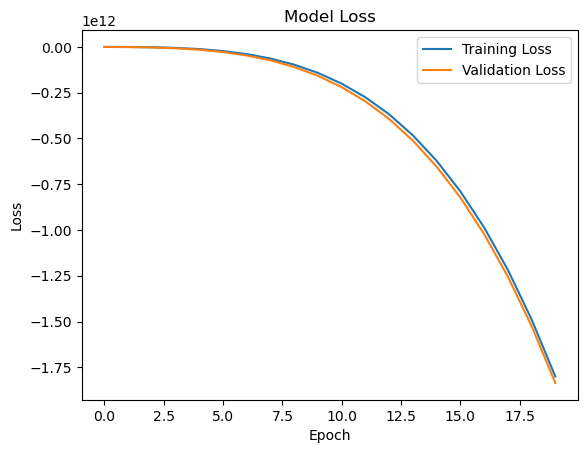

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Model

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare the testing data = user and book inputs, actual ratings
test_users = test_data[:, 0]
test_books = test_data[:, 1]
test_ratings = test_data[:, 2]  # Actual ratings for comparison

# Make predictions on the test data
predictions = model.predict([test_users, test_books])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_ratings, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(test_ratings, predictions)
print("Mean Absolute Error (MAE):", mae)

6445/6445 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step
Root Mean Squared Error (RMSE): 3.361702030757911
Mean Absolute Error (MAE): 2.812573502442883


Using MSE instead of Binary Loss

In [17]:
# Import Tensor Flow and necessary modules
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Define hyperparameters
embedding_dim = 50
num_users = int(train_data[:, 0].max() + 1)
num_books = int(train_data[:, 1].max() + 1)

# Define input layers
user_input = Input(shape=(1,), name='User-Input')
book_input = Input(shape=(1,), name='Book-Input')

# Create embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='User-Embedding')(user_input)
book_embedding = Embedding(input_dim=num_books, output_dim=embedding_dim, name='Book-Embedding')(book_input)

# Flatten the embeddings
user_vector = Flatten(name='Flatten-User')(user_embedding)
book_vector = Flatten(name='Flatten-Book')(book_embedding)

# Concatenate the embeddings and add hidden layers
concatenated = Concatenate(name='Concatenate')([user_vector, book_vector])
dense_layer_1 = Dense(128, activation='relu', name='Dense-Layer-1')(concatenated)
dropout_1 = Dropout(0.3)(dense_layer_1)
dense_layer_2 = Dense(64, activation='relu', name='Dense-Layer-2')(dropout_1)
dropout_2 = Dropout(0.3)(dense_layer_2)

# Output layer with linear activation for MSE
output = Dense(1, activation='linear', name='Output-Layer')(dropout_2)

# Define the model
model = Model(inputs=[user_input, book_input], outputs=output)

# Compile the model with MSE loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ User-Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book-Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 50)     │  4,605,300 │ User-Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Book-Embedding      │ (None, 1, 50)     │ 12,053,550 │ Book-Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Flatten-User        │ (None, 50)        │          0 │ User-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Flatten-Book        │ (None, 50)        │          0 │ Book-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Concatenate         │ (None, 100)       │          0 │ Flatten-User[0][… │
│ (Concatenate)       │                   │            │ Flatten-Book[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense-Layer-1       │ (None, 128)       │     12,928 │ Concatenate[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128)       │          0 │ Dense-Layer-1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense-Layer-2       │ (None, 64)        │      8,256 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ Dense-Layer-2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output-Layer        │ (None, 1)         │         65 │ dropout_3[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,680,099 (63.63 MB)

 Trainable params: 16,680,099 (63.63 MB)

 Non-trainable params: 0 (0.00 B)

Training with MSE

In [18]:
# Split train_data into user, book, and rating components for model input
train_users = train_data[:, 0]
train_books = train_data[:, 1]
train_ratings = train_data[:, 2]

# Prepare validation data
val_users = test_data[:, 0]
val_books = test_data[:, 1]
val_ratings = test_data[:, 2]

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    x=[train_users, train_books],
    y=train_ratings,
    validation_data=([val_users, val_books], val_ratings),
    epochs=20,
    batch_size=256,
    callbacks=[early_stopping]
)

Epoch 1/20


C:\Users\0watsc31\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['User-Input', 'Book-Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


3223/3223 ━━━━━━━━━━━━━━━━━━━━ 416s 129ms/step - loss: 12.8072 - mae: 2.9055 - val_loss: 11.3010 - val_mae: 2.8126
Epoch 2/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 414s 129ms/step - loss: 9.7586 - mae: 2.3939 - val_loss: 11.5978 - val_mae: 2.7262
Epoch 3/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 410s 127ms/step - loss: 8.1378 - mae: 2.0606 - val_loss: 12.2337 - val_mae: 2.7629
Epoch 4/20
3223/3223 ━━━━━━━━━━━━━━━━━━━━ 409s 127ms/step - loss: 6.9406 - mae: 1.8418 - val_loss: 12.7543 - val_mae: 2.7442


Viewing Training Progress

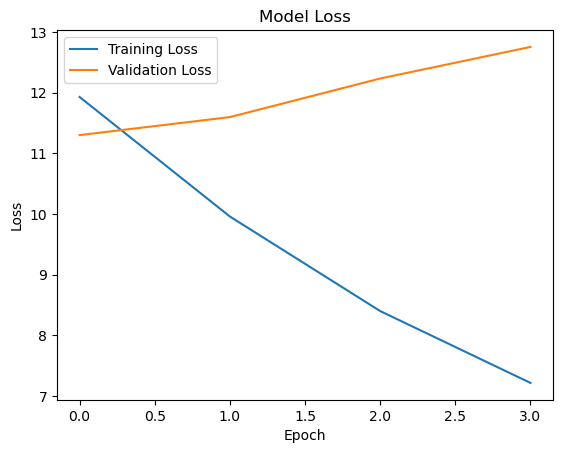

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Model

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Prepare the testing data = user and book inputs, actual ratings
test_users = test_data[:, 0]
test_books = test_data[:, 1]
test_ratings = test_data[:, 2]  # Actual ratings for comparison

# Make predictions on the test data
predictions = model.predict([test_users, test_books])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_ratings, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate MAE
mae = mean_absolute_error(test_ratings, predictions)
print("Mean Absolute Error (MAE):", mae)

6445/6445 ━━━━━━━━━━━━━━━━━━━━ 3s 516us/step
Root Mean Squared Error (RMSE): 3.361702030757911
Mean Absolute Error (MAE): 2.812573502442883
